### probability density function (PDF)

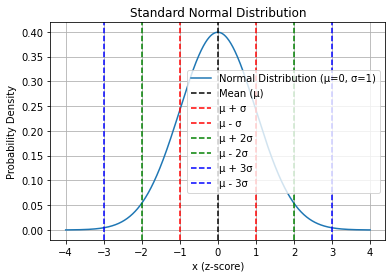

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the normal distribution
mu = 0      # mean
sigma = 1   # standard deviation

# Generate x values
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, mu, sigma)

# Plot the normal distribution curve
plt.plot(x, y, label="Normal Distribution (μ=0, σ=1)")
plt.title("Standard Normal Distribution")
plt.xlabel("x (z-score)")
plt.ylabel("Probability Density")

# Mark mean and standard deviations
plt.axvline(mu, color='black', linestyle='--', label="Mean (μ)")
plt.axvline(mu+sigma, color='red', linestyle='--', label="μ + σ")
plt.axvline(mu-sigma, color='red', linestyle='--', label="μ - σ")
plt.axvline(mu+2*sigma, color='green', linestyle='--', label="μ + 2σ")
plt.axvline(mu-2*sigma, color='green', linestyle='--', label="μ - 2σ")
plt.axvline(mu+3*sigma, color='blue', linestyle='--', label="μ + 3σ")
plt.axvline(mu-3*sigma, color='blue', linestyle='--', label="μ - 3σ")

plt.legend()
plt.grid(True)
plt.show()


#### Here’s the normal distribution curve with the mean (𝜇) and standard deviations (±1𝜎,±2𝜎,±3𝜎) marked. This illustrates the 68–95–99.7 rule visually.


#### plot the t-distribution curves

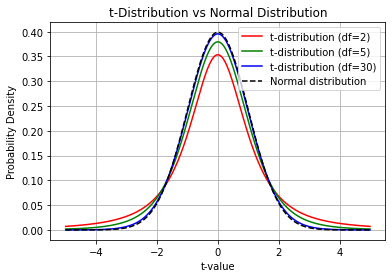

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm

# x values
x = np.linspace(-5, 5, 1000)

# Different degrees of freedom
dfs = [2, 5, 30]
colors = ['red', 'green', 'blue']

# Plot t-distributions
for df, color in zip(dfs, colors):
    plt.plot(x, t.pdf(x, df), color=color, label=f"t-distribution (df={df})")

# Plot normal distribution for comparison
plt.plot(x, norm.pdf(x, 0, 1), 'black', linestyle='--', label="Normal distribution")

# Title and labels
plt.title("t-Distribution vs Normal Distribution")
plt.xlabel("t-value")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()


#### Here’s the comparison of t-distributions with different degrees of freedom (df = 2, 5, 30) against the standard normal distribution (dashed black line):

With small df (e.g., 2, 5) → the curve has heavier tails (more extreme values likely).

With large df (e.g., 30) → the curve closely matches the normal distribution.


### The Poisson distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time, distance, area, or volume, if:

Events occur independently.

The average rate of occurrence (
𝜆
λ) is constant.

Two events cannot occur at exactly the same instant (mutually exclusive).

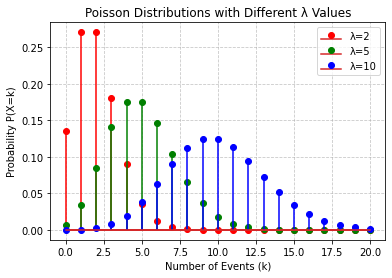

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Values of lambda to compare
lambdas = [2, 5, 10]
colors = ['r', 'g', 'b']  # Use matplotlib short color codes

# Maximum k value to display
k_max = 20
k = np.arange(0, k_max+1)

# Plot Poisson distributions
for lam, color in zip(lambdas, colors):
    markerline, stemlines, baseline = plt.stem(
        k, poisson.pmf(k, lam), label=f"λ={lam}", use_line_collection=True)
    plt.setp(markerline, color=color)
    plt.setp(stemlines, color=color)

# Title and labels
plt.title("Poisson Distributions with Different λ Values")
plt.xlabel("Number of Events (k)")
plt.ylabel("Probability P(X=k)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()



#### Increasing λ in a Poisson distribution increases both the expected number of events and the spread (variance) of outcomes. This is visible in the plot as the red, green, and blue stems move rightward and become less steep for λ = 2, 5, and 10, respectively.



### Binomial Distribution 

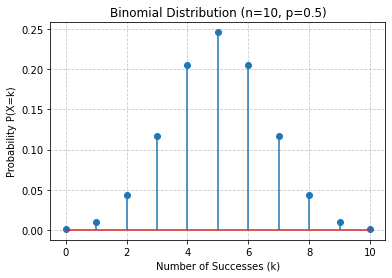

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
n = 10           # Number of trials
p = 0.5          # Probability of success
k = np.arange(0, n+1)

# Binomial PMF
pmf = binom.pmf(k, n, p)

# Plot
plt.stem(k, pmf, use_line_collection=True)
plt.xlabel("Number of Successes (k)")
plt.ylabel("Probability P(X=k)")
plt.title(f"Binomial Distribution (n={n}, p={p})")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


### one-sample Z-test assuming known population standard deviation:

In [7]:
import numpy as np
from scipy.stats import norm

# Sample data
sample = np.array([5.1, 5.3, 4.9, 5.0, 5.2])
sample_mean = np.mean(sample)
sample_size = len(sample)

# Known population parameters
population_mean = 5.0
population_std = 0.1  # known population std deviation

# Calculate Z-score
z = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))

# Calculate p-value for two-tailed test
p_value = 2 * (1 - norm.cdf(abs(z)))

print(f"Sample Mean: {sample_mean:.3f}")
print(f"Z-score: {z:.3f}")
print(f"P-value: {p_value:.5f}")

# Conclusion at alpha = 0.05
if p_value < 0.05:
    print("Reject null hypothesis: sample mean significantly differs from population mean")
else:
    print("Fail to reject null hypothesis: no significant difference")


Sample Mean: 5.100
Z-score: 2.236
P-value: 0.02535
Reject null hypothesis: sample mean significantly differs from population mean


 ### two-sample Z-test or tests for proportions!The code you provided seems to contain a problem with how colors and formats are specified in the plt.stem() function. The linefmt and markerfmt arguments expect specific format strings, not just color names.

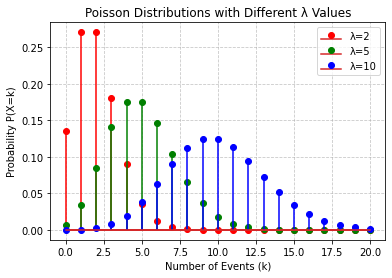

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

lambdas = [2, 5, 10]
colors = ['r', 'g', 'b']  # Use short color codes

k_max = 20
k = np.arange(0, k_max + 1)

for lam, color in zip(lambdas, colors):
    markerline, stemlines, baseline = plt.stem(
        k, poisson.pmf(k, lam), label=f"λ={lam}", use_line_collection=True
    )
    plt.setp(markerline, color=color)
    plt.setp(stemlines, color=color)

plt.title("Poisson Distributions with Different λ Values")
plt.xlabel("Number of Events (k)")
plt.ylabel("Probability P(X=k)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


### T - Test

In [9]:
import numpy as np
from scipy.stats import ttest_1samp

# Sample data
sample = np.array([5.1, 5.3, 4.9, 5.0, 5.2])

# Population mean to compare against
population_mean = 5.0

# Perform one-sample t-test
t_stat, p_value = ttest_1samp(sample, population_mean)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.5f}")

# Interpretation based on significance level, typically alpha=0.05
if p_value < 0.05:
    print("Reject null hypothesis: Sample mean is significantly different from population mean.")
else:
    print("Fail to reject null hypothesis: No significant difference found.")


T-statistic: 1.414
P-value: 0.23020
Fail to reject null hypothesis: No significant difference found.


### Chi-Square Test

In [10]:
import numpy as np
from scipy.stats import chi2_contingency

# Example observed frequencies in a 2x3 contingency table
observed = np.array([[30, 10, 20],
                     [20, 20, 20]])

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(observed)

print(f"Chi-square statistic: {chi2_stat:.3f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_value:.5f}")
print("Expected frequencies:")
print(expected)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis - variables are associated.")
else:
    print("Fail to reject null hypothesis - no significant association.")


Chi-square statistic: 5.333
Degrees of freedom: 2
P-value: 0.06948
Expected frequencies:
[[25. 15. 20.]
 [25. 15. 20.]]
Fail to reject null hypothesis - no significant association.


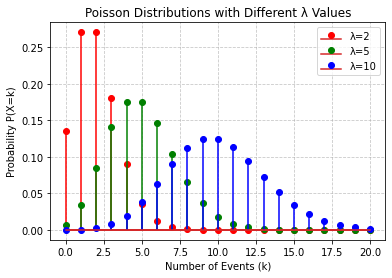

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Values of lambda to compare
lambdas = [2, 5, 10]
colors = ['r', 'g', 'b']  # Use matplotlib short color codes

# Maximum k value to display
k_max = 20
k = np.arange(0, k_max+1)

# Plot Poisson distributions
for lam, color in zip(lambdas, colors):
    markerline, stemlines, baseline = plt.stem(
        k, poisson.pmf(k, lam), label=f"λ={lam}", use_line_collection=True)
    plt.setp(markerline, color=color)
    plt.setp(stemlines, color=color)

# Title and labels
plt.title("Poisson Distributions with Different λ Values")
plt.xlabel("Number of Events (k)")
plt.ylabel("Probability P(X=k)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


### Key insights:

For λ=2, the distribution peaks near 2 events with the highest probability, rapidly decreasing for larger 
k
k.

For λ=5, the peak shifts right towards 5 events, and the distribution spreads out over a wider range.

For λ=10, the distribution centers at 10 events with even broader spread, indicating higher variability.

As λ increases, both the expected number of events and the variability grow, shifting the distribution’s mass rightward and flattening the peak. This illustrates typical Poisson behavior where mean and variance are both equal to λ. The plot visually compares the effect of different λ values on event count probabilities.

### The ANOVA model as we’ve been talking about so far (which has ignored interactions) covers a range of different patterns that we might observe in our data. For instance, in a two-way ANOVA design, there are four possibilities: (a) only Factor A matters, (b) only Factor B matters, (c) both A and B matter, and (d) neither A nor B matters

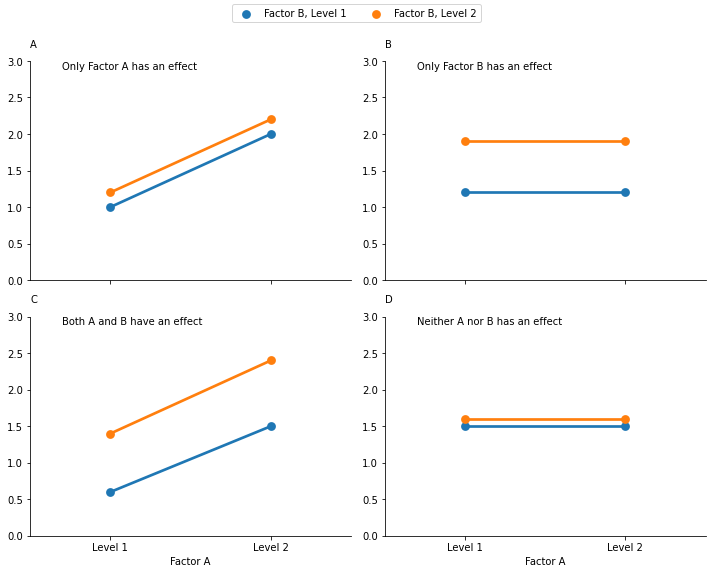

In [13]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

levels = ['Level 1', 'Level 1', 'Level 2', 'Level 2']
factors = ['Factor B, Level 1', 'Factor B, Level 2', 'Factor B, Level 1', 'Factor B, Level 2']
panel1 = [1, 1.2, 2, 2.2]
panel2 = [1.2, 1.9, 1.2, 1.9]
panel3 = [0.6, 1.4, 1.5, 2.4]
panel4 = [1.5, 1.6, 1.5, 1.6]

d = pd.DataFrame({
    'Factor': factors,
    'Factor A': levels,
    'Panel 1': panel1,
    'Panel 2': panel2,
    'Panel 3': panel3,
    'Panel 4': panel4
})

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

p1 = sns.pointplot(data=d, x='Factor A', y='Panel 1', hue='Factor', errorbar=('ci', False), ax=axes[0,0])
p2 = sns.pointplot(data=d, x='Factor A', y='Panel 2', hue='Factor', errorbar=('ci', False), ax=axes[0,1])
p3 = sns.pointplot(data=d, x='Factor A', y='Panel 3', hue='Factor', errorbar=('ci', False), ax=axes[1,0])
p4 = sns.pointplot(data=d, x='Factor A', y='Panel 4', hue='Factor', errorbar=('ci', False), ax=axes[1,1])

ps = [p1, p2, p3, p4]
panelID = ['A', 'B', 'C', 'D']
titles = ['Only Factor A has an effect', 'Only Factor B has an effect', 
          'Both A and B have an effect', 'Neither A nor B has an effect']

for n, p in enumerate(ps):
    p.set_ylim(0, 3)
    p.set_ylabel('')
    p.set_xlabel('')
    p.get_legend().remove()
    p.text(0.1, 1, titles[n], horizontalalignment='left', verticalalignment='top', transform=p.transAxes)
    p.text(0, 1.1, panelID[n], horizontalalignment='left', verticalalignment='top', transform=p.transAxes)
    sns.despine(ax=p)

p1.set_xticklabels('')
p2.set_xticklabels('')

p3.set_xlabel('Factor A')
p4.set_xlabel('Factor A')

handles, labels = p1.get_legend_handles_labels()
fig.legend(handles, ['Factor B, Level 1', 'Factor B, Level 2'], loc='upper center', ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])

# Plot figure in book, with caption
# from myst_nb import glue
# plt.close(fig)
# glue("anovas-sans-interaction-fig", fig, display=False)

plt.show()
